In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("Drug Classification100")

In [6]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [7]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<AxesSubplot:>

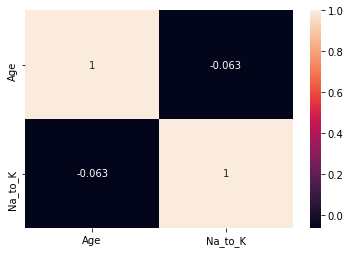

In [12]:
sns.heatmap(data.corr(),annot=True)

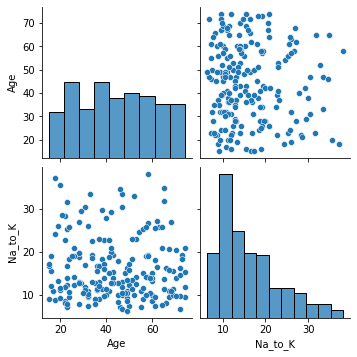

In [13]:
sns.pairplot(data)

<AxesSubplot:xlabel='Sex'>

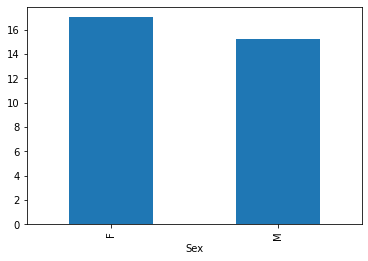

In [19]:
data.groupby("Sex")["Na_to_K"].mean().plot.bar()
#here feamale count is more

c:\users\jagad\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

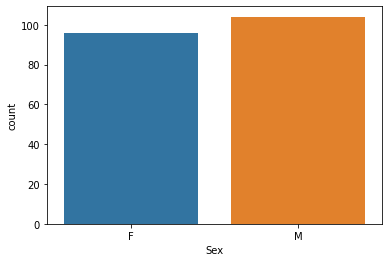

In [29]:
sns.countplot(data.Sex)
#counts of male and feamale

<AxesSubplot:xlabel='BP'>

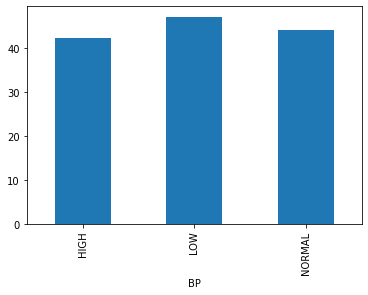

In [36]:
data.groupby("BP")["Age"].mean().plot.bar()
#for age more than 45 Low Bp was present

<AxesSubplot:xlabel='Cholesterol'>

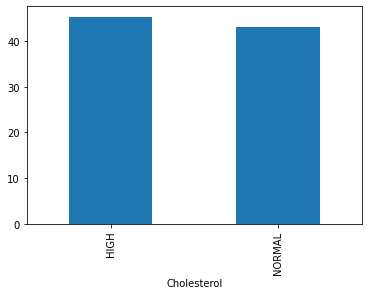

In [37]:
data.groupby("Cholesterol")["Age"].mean().plot.bar()
#there is no much diffrence here

c:\users\jagad\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Drug', ylabel='count'>

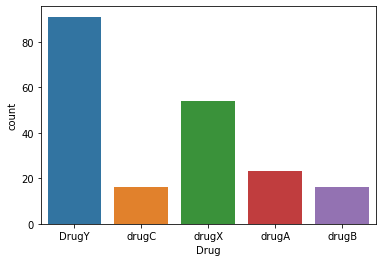

In [38]:
sns.countplot(data.Drug)
#DrugY variable is more in count as it use more 

<AxesSubplot:xlabel='Drug'>

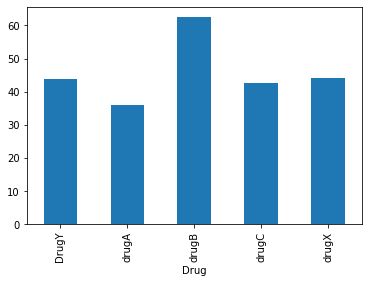

In [41]:
data.groupby("Drug")["Age"].mean().plot.bar()
#drug B is used more in the age greater than 60

<AxesSubplot:title={'center':'Age'}, xlabel='Drug'>

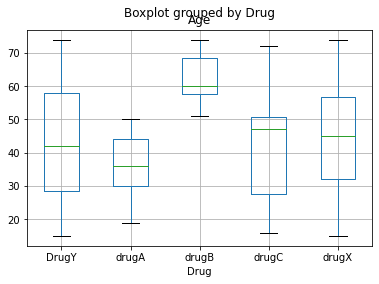

In [44]:
data.boxplot("Age","Drug",grid=True,)
#there are no outliers

In [45]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [57]:
#Encode the labels
from sklearn.preprocessing import LabelEncoder
def label_encoder(y):
        encoder=LabelEncoder()
        data[y]=encoder.fit_transform(data[y])
        


In [58]:
to_encode=data[["Sex","BP","Cholesterol","Na_to_K","Drug"]]
for i in to_encode:
    label_encoder(i)
    

In [59]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [61]:
#splitting the data
x=data.iloc[:,:-1]
y=data[["Drug"]]

In [63]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,167
1,47,1,1,0,89
2,47,1,1,0,43
3,28,0,2,0,10
4,61,0,1,0,133


In [64]:
#using train test split
from sklearn.model_selection import train_test_split

In [65]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [68]:
#using Knn classifier
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn=KNeighborsClassifier()

In [74]:
#importing cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score

In [82]:
accuracy=cross_val_score(knn,xtrain,ytrain,cv=5)
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)
f = fbeta_score(ytest, pred, beta=1.0,sample_weight=None,average='weighted')
print("the prediction score by using f_beta",f)
print("accuracy of cv_score",max(accuracy))


the prediction score by using f_beta 0.6523809523809524
accuracy of cv_score 0.6875


c:\users\jagad\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\jagad\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\jagad\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\jagad\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
classifier=RandomForestClassifier()

In [85]:
accuracy=cross_val_score(classifier,xtrain,ytrain,cv=5)
classifier.fit(xtrain,ytrain)
pred=classifier.predict(xtest)
f=fbeta_score(ytest,pred,beta=1.0,sample_weight=None,average='weighted')
print("the score of prediction using fbeta ",f)
print("accuracy using crossval",max(accuracy))

c:\users\jagad\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jagad\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jagad\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jagad\appdata\local\programs\pytho

the score of prediction using fbeta  1.0
accuracy using crossval 1.0


In [87]:
#we got complete accuracy

print("Train Score:",np.mean(accuracy))
print("Test Score:", classifier.score(xtest,ytest))

Train Score: 0.9875
Test Score: 1.0


In [ ]:
#using random forest we got best results